# Data Loading

In [6]:
# Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define path to raw data files
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "raw"))

# files in the data directory
files = os.listdir(data_path)


In [ ]:
# files in the data directory
files = os.listdir(data_path)

In [9]:
# Create a dictionary where each key is a file name and the value is a DataFrame with the data.
custom_names = {
    "olist_customers_dataset.csv": "customer",
    "olist_geolocation_dataset.csv": "geolocation",
    "olist_order_items_dataset.csv": "order_items",
    "olist_order_payments_dataset.csv": "payments",
    "olist_orders_dataset.csv": "orders",
    "olist_products_dataset.csv": "products",
    "olist_sellers_dataset.csv": "sellers"
}

dfs = {
    custom_names[file]: pd.read_csv(os.path.join(data_path, file))
    for file in files if file in custom_names
}

# Data Cleaning and preprocessing

## Orders Dataframe: treatment and Type Conversion

In [11]:
orders = dfs["orders"]  # Extract the 'orders' DataFrame

#### Null and Missing values treatment

In [13]:
# Identifying null or missing values.
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


There are null numerical values in the order approval date column, indicating that the orders were not approved. The shipping date column also contains null values, indicating that the order was not shipped. Lastly, the delivery date column also contains null values, indicating that the order was not delivered. However, the data will be kept as is, since the column type will be changed to datetime and the null values will become NaT (Not a Time). This maintains data consistency and avoids issues with operations involving dates.

In [14]:
# Checking column data types
print(orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### Columns type conversion


Converting date columns from object to datetime

In [15]:

date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

In [16]:
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

Converting "order status" column from object to category

In [17]:
orders["order_status"] = orders["order_status"].astype("category")

## Orders Items Dataframe: treatment and Type Conversion

In [19]:
order_items = dfs["order_items"]  # Extract the 'order_items' DataFrame

#### Null and Missing values treatment

In [21]:
# Identifying null or missing values.
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [22]:
# Checking column data types
print(order_items.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Converting date columns from object to datetime

In [23]:
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce")

## Customers Dataframe: treatment and Type Conversion

In [25]:
customer = dfs["customer"]  # Extract the 'customers' DataFrame

#### Null and Missing values treatment

In [27]:
# Identifying null or missing values.
print(customer.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [28]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Products Dataframe: treatment and Type Conversion

In [29]:
products = dfs["products"]  # Extract the 'products' DataFrame

#### Null and Missing values treatment

In [31]:
# Identifying null or missing values.
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Null values were found in the product category name, which will be filled with "Unknown". Null values were also found in the columns: product name length, description length, and number of photos. These will be filled with the median to avoid distortions caused by extreme values. Finally, two null values were found in the columns: weight, length, height, and width. All of these will also be filled with the median.

In [32]:
# Null and missing values treatment.
products["product_category_name"].fillna("Unknown", inplace=True)
num_cols = [
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

#### Columns type conversion

In [ ]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Sellers Dataframe: treatment and Type Conversion

In [35]:
sellers = dfs["sellers"]  # Extract the 'sellers' DataFrame

#### Null and Missing values treatment

In [37]:
# Identifying null or missing values.
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [38]:
# Checking column data types
print(sellers.dtypes)

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


The column data types are correct.

## Payments Dataframe: treatment and Type Conversion

In [39]:
payments = dfs["payments"]  # Extract the 'payments' DataFrame

#### Null and Missing values treatment

In [41]:
# Identifying null or missing values.
print(payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [42]:
# Checking column data types
print(payments.dtypes)

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


Converting 'payment_type' column from object to category.

In [43]:
payments["payment_type"] = payments["payment_type"].astype("category")

## Geolocation: treatment and Type Conversion

In [45]:
geolocation = dfs["geolocation"]  # Extract the 'geolocation' DataFrame

#### Null and Missing values treatment

In [47]:
# Identifying null or missing values.
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [48]:
# Checking column data types
print(geolocation.dtypes)

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


The column data types are correct.

## Saving the processed Dataframes

In [49]:
# Saving the processed Dataframes in the "../data/processed".
processed_path = os.path.abspath(
    os.path.join(current_dir, "..", "data", "processed"))

In [100]:
for file, df in dfs.items():
    file_name = f"{file}.csv"
    df.to_csv(os.path.join(processed_path, file_name), index=False)


# Exploratory Data Analysis

In this section, we explore the dataset to gain insights into customer behavior, order patterns and the overall performance of a Brazilian e-commerce marketplace. Through visualizations and descriptive statistics, we aim to build a solid understanding of the dataset before moving on to more advanced analytics or machine learning steps.

## Orders counts by status

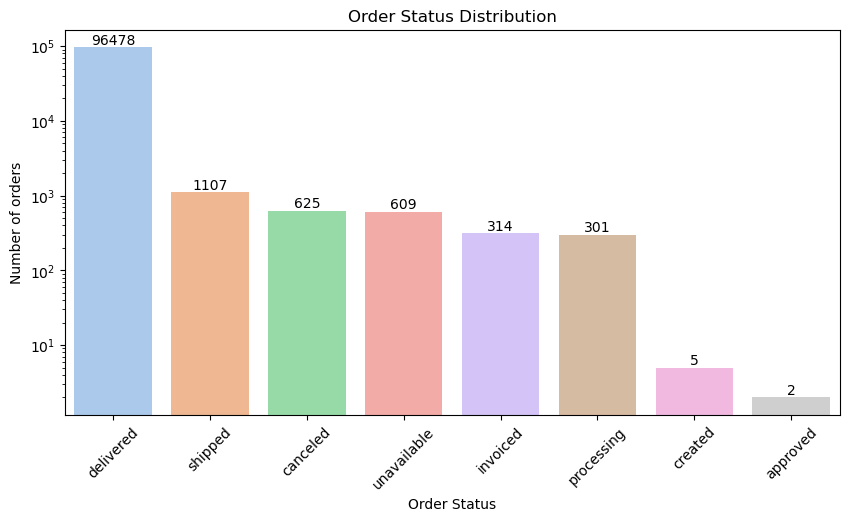

In [51]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=orders, x ="order_status", order=orders["order_status"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of orders")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )
plt.show()



## Orders over time

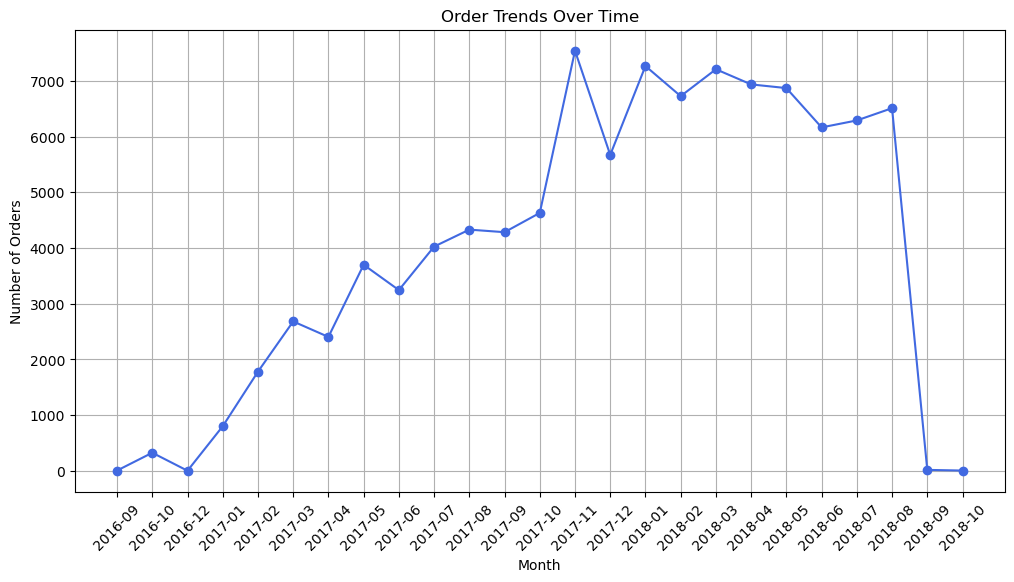

In [52]:
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There was a growth trend in the number of orders from December 2016 to November 2017, 
followed by a stabilization period from December 2017 to August 2018. However, there was 
a sharp drop in orders from August to October. It's important to check whether there is 
data available for the final months or if the dataset simply ends there.

In [53]:
# Checking if data exists for the last months
print(monthly_orders.tail(10))  # Last 10 months available

order_purchase_month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


There were orders in the last months, but the quantity is well below normal, indicating that the dataset is likely incomplete for the final months.

## Checking order cancellations over time

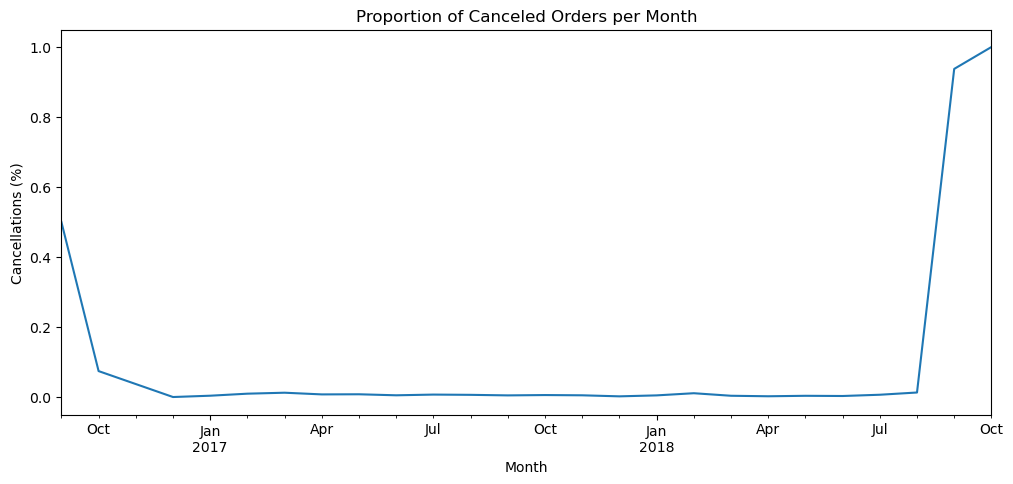

In [56]:
orders.groupby("order_purchase_month")["order_status"].value_counts(normalize=True).unstack()["canceled"].plot(
    kind="line", figsize=(12, 5))
plt.title("Proportion of Canceled Orders per Month")
plt.xlabel("Month")
plt.ylabel("Cancellations (%)")
plt.show()

The graph shows that the proportion of canceled orders rose to around 100% in the last few months.

## Data Note

The charts indicate that there is a normal pattern in the data, except for the months starting from August. The likely reason is that the data from August onward is incomplete, with only cancellations being imported. Therefore, the chosen approach to prevent this discrepancy in order volume from affecting further analyses and models will be remove the rows related to those months.

#### REMOVING ROWS RELATED TO MONTHS WITH DATA DISCREPANCIES

In [102]:
def olist_filter_and_save(
    orders, order_items, payments, customer, products, sellers
):
    # Filtra as ordens até julho de 2018
    orders_filtered = orders[orders['order_purchase_timestamp'] < '2018-08-01']

    # IDs válidos
    valid_order_ids = orders_filtered['order_id']
    valid_customer_ids = orders_filtered['customer_id']

    # Filtrando os demais dataframes com base nos dados válidos
    order_items_filtered = order_items[order_items['order_id'].isin(valid_order_ids)]
    payments_filtered = payments[payments['order_id'].isin(valid_order_ids)]
    customer_filtered = customer[customer['customer_id'].isin(valid_customer_ids)]
    products_filtered = products[products['product_id'].isin(order_items_filtered['product_id'])]
    sellers_filtered = sellers[sellers['seller_id'].isin(order_items_filtered['seller_id'])]

    # Dicionário com os DataFrames filtrados
    dfs = {
        "orders": orders_filtered,
        "order_items": order_items_filtered,
        "payments": payments_filtered,
        "customer": customer_filtered,
        "products": products_filtered,
        "sellers": sellers_filtered,
    }

    # Caminho relativo para salvar
    current_dir = os.getcwd()
    processed_path = os.path.abspath(os.path.join(current_dir, "..", "data", "processed"))

    # Salvar os DataFrames em arquivos CSV
    for file_name, df in dfs.items():
        file_path = os.path.join(processed_path, f"{file_name}.csv")
        df.to_csv(file_path, index=False)

    return dfs

# Chama a função para aplicar o filtro e salvar os arquivos
olist_filter_and_save(orders, order_items, payments, customer, products, sellers)



{'orders':                                order_id                       customer_id  \
 0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 3      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 4      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
 ...                                 ...                               ...   
 92904  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
 92905  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
 92906  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
 92907  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
 92908  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
 
       order_status order_purchase_timestamp    orde